**Méthode de Transformation Bilinéaire**

La méthode de transformation bilinéaire est une technique utilisée pour transformer un filtre analogique en un filtre numérique. Elle consiste à appliquer une transformation non linéaire à la variable complexe pour convertir un filtre analogique (en fonction de p) en un filtre numérique (en fonction de z).

Réponse fréquentielle du filtre analogique

Le premier graphique montre la réponse fréquentielle du filtre analogique

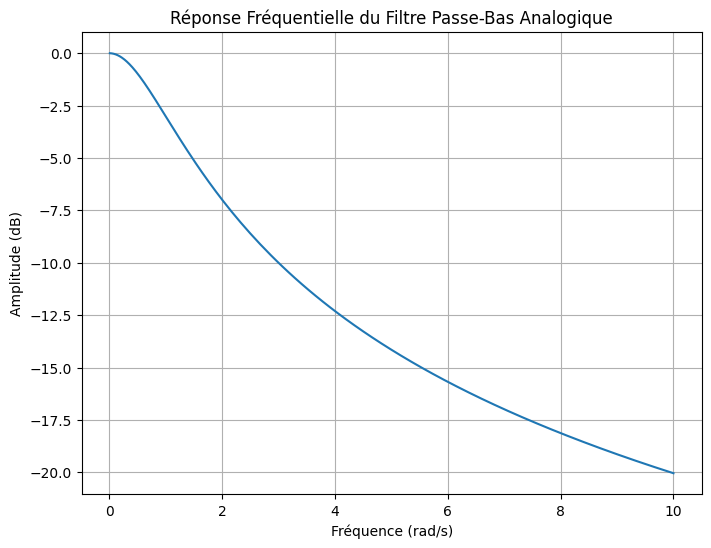

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqs

# Définition des paramètres
wc = 1  # Fréquence de coupure analogique (exemple : wc = 1 rad/s)
numerator = [wc]  # Numérateur de H(s)
denominator = [1, wc]  # Dénominateur de H(s)

# Calcul de la réponse fréquentielle
w, h = freqs(numerator, denominator)

# Graphique de la réponse fréquentielle analogique
plt.figure(figsize=(8, 6))
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Réponse Fréquentielle du Filtre Passe-Bas Analogique')
plt.xlabel('Fréquence (rad/s)')
plt.ylabel('Amplitude (dB)')
plt.grid()
plt.show()


Transformation bilinéaire (Mapping p vers z)

Cette illustration montre la transformation non linéaire du domaine analogique vers le domaine numérique.



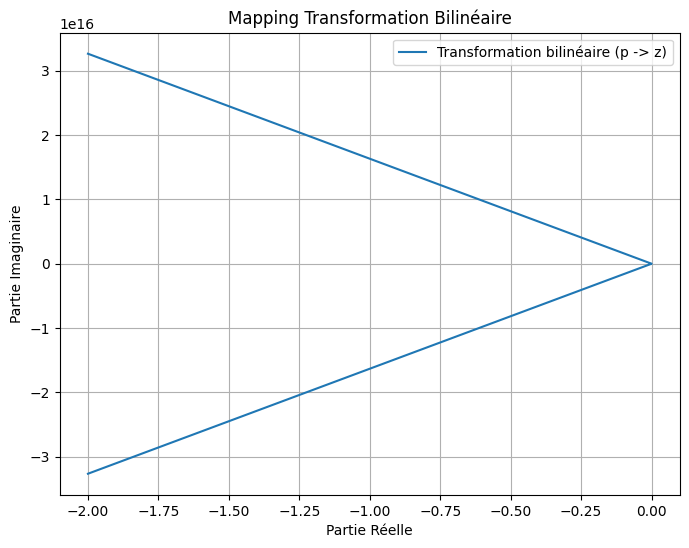

In [3]:
T =1
# Illustration du mapping entre les axes p et z
theta = np.linspace(-np.pi, np.pi, 1000)
p = 1j * theta
z = (2/T) * (1 - np.exp(-p)) / (1 + np.exp(-p))

plt.figure(figsize=(8, 6))
plt.plot(np.real(z), np.imag(z), label='Transformation bilinéaire (p -> z)')
plt.title('Mapping Transformation Bilinéaire')
plt.xlabel('Partie Réelle')
plt.ylabel('Partie Imaginaire')
plt.grid()
plt.legend()
plt.show()


Réponse fréquentielle du filtre numérique

Enfin, ce graphique montre la réponse fréquentielle du filtre obtenu après transformation bilinéaire

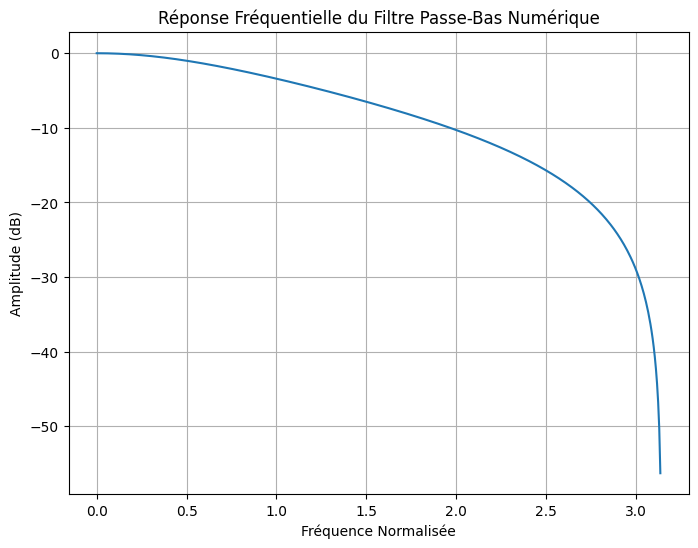

In [4]:
from scipy.signal import freqz

# Paramètres du filtre numérique après transformation bilinéaire
T = 1  # Exemple : Période d'échantillonnage T = 1s
omega_c = 1
numerator_z = [omega_c, omega_c]  # Numérateur de H(z)
denominator_z = [omega_c + 2/T, omega_c - 2/T]  # Dénominateur de H(z)

# Calcul de la réponse fréquentielle du filtre numérique
w, h = freqz(numerator_z, denominator_z)

# Graphique de la réponse fréquentielle numérique
plt.figure(figsize=(8, 6))
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Réponse Fréquentielle du Filtre Passe-Bas Numérique')
plt.xlabel('Fréquence Normalisée')
plt.ylabel('Amplitude (dB)')
plt.grid()
plt.show()



La réponse impulsionnelle dans le domaine discret

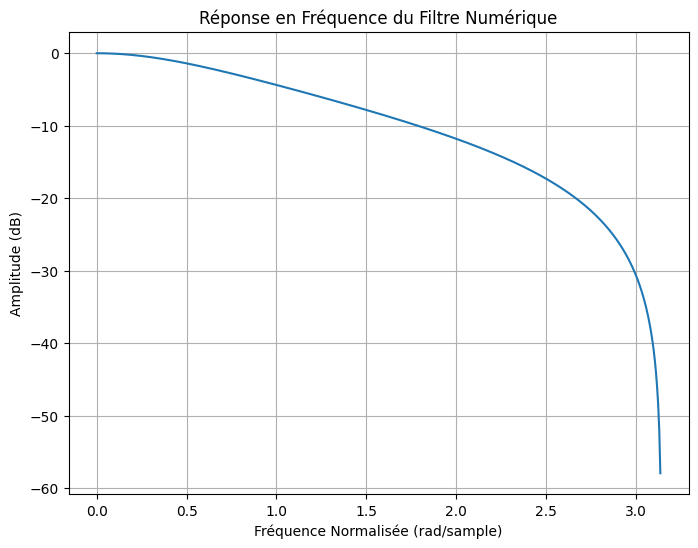

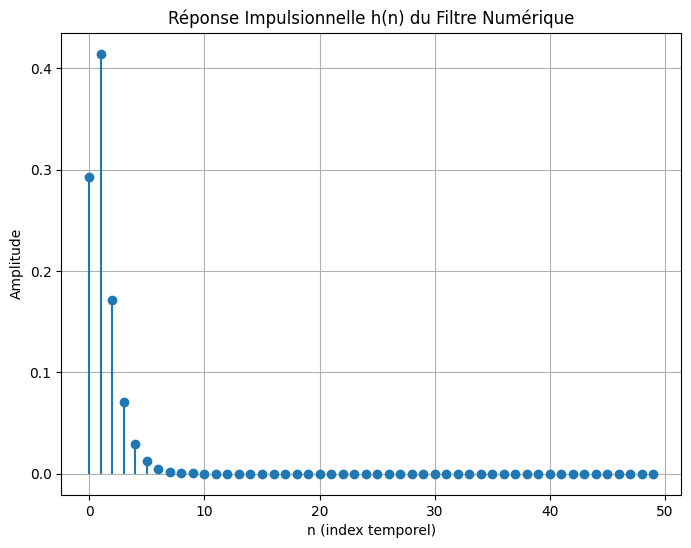

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, dimpulse, dlti

# 1. Définition de la fonction de transfert numérique
# Coefficients de la fonction de transfert H(z)
b = [0.2929, 0.2929]  # Coefficients du numérateur (exemple pour un filtre passe-bas)
a = [1, -0.4142]      # Coefficients du dénominateur

# 2. Calcul et traçage de la réponse en fréquence du filtre numérique
w, h = freqz(b, a)  # w: fréquences normalisées, h: réponse en fréquence

plt.figure(figsize=(8, 6))
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Réponse en Fréquence du Filtre Numérique')
plt.xlabel('Fréquence Normalisée (rad/sample)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.show()

# 3. Calcul de la réponse impulsionnelle du filtre numérique
# Le filtre est défini par ses coefficients (b et a)
system = dlti(b, a)  # Crée un système LTI discret

# Calcul de la réponse impulsionnelle pour 50 points
t, h_imp = dimpulse(system, n=50)

# 4. Traçage de la réponse impulsionnelle
plt.figure(figsize=(8, 6))
plt.stem(t, np.squeeze(h_imp), basefmt=" ")
plt.title('Réponse Impulsionnelle h(n) du Filtre Numérique')
plt.xlabel('n (index temporel)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
